### Amsterdam Airbnb Project
Objective: The goal of this analysis is to explore the Amsterdam Airbnb dataset to understand its general structure and the insights it can provide. This dataset contains various features related to Airbnb listings, such as room types, prices, host details, location information, and more.

### Table of Contents


* [Data]
* [Neighbourhood]
* [Interactive Map]
* [Room Type]
* [Top Hosts]
* [Relationship Price and Number of Nights]
* [Conclusion]

### Data

In [112]:
pip install xyzservices


Note: you may need to restart the kernel to use updated packages.


In [155]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [89]:
df = pd.read_csv('amsterdam_airbnb.csv')

In [128]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [130]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [132]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9659 non-null   int64  
 1   name                            9659 non-null   object 
 2   host_id                         9659 non-null   int64  
 3   host_name                       9659 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   9659 non-null   object 
 6   latitude                        9659 non-null   float64
 7   longitude                       9659 non-null   float64
 8   room_type                       9659 non-null   object 
 9   price                           9659 non-null   float64
 10  minimum_nights                  9659 non-null   int64  
 11  number_of_reviews               9659 non-null   int64  
 12  last_review                     96

In [134]:
print(df.isnull().sum())

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               9659
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             97
dtype: int64


In [136]:
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [187]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


print(f"Önceki veri sayısı: {len(df)}")
print(f"Temizlenmiş veri sayısı: {len(df_cleaned)}")


df_cleaned['price'].describe()


Önceki veri sayısı: 9659
Temizlenmiş veri sayısı: 7537


count    7537.000000
mean      220.461855
std        38.198622
min       125.000000
25%       210.000000
50%       225.000000
75%       225.000000
max       325.000000
Name: price, dtype: float64

In [189]:

df['price'] = df['price'].fillna(df['price'].median())


In [142]:
print(df.isnull().sum())

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               9659
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                             97
dtype: int64


In [108]:
print(df.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [191]:

print("\nSummary:")
print(df.describe())


Summary:
                 id       host_id  neighbourhood_group     latitude  \
count  9.659000e+03  9.659000e+03                  0.0  9659.000000   
mean   4.583572e+17  1.213571e+08                  NaN    52.366594   
std    4.837813e+17  1.608260e+08                  NaN     0.017328   
min    2.818000e+03  3.159000e+03                  NaN    52.290276   
25%    2.217078e+07  1.165785e+07                  NaN    52.355610   
50%    5.365568e+07  4.113008e+07                  NaN    52.365569   
75%    9.330041e+17  1.690638e+08                  NaN    52.376405   
max    1.238450e+18  5.995651e+08                  NaN    52.425159   

         longitude         price  minimum_nights  number_of_reviews  \
count  9659.000000   9659.000000     9659.000000        9659.000000   
mean      4.889761    264.276012        4.215343          45.636919   
std       0.035550    948.976721       19.845051         118.572029   
min       4.755870     11.000000        1.000000           0.00000

In [193]:

print("\nData types:")
print(df.dtypes)



Data types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### Neighborhood

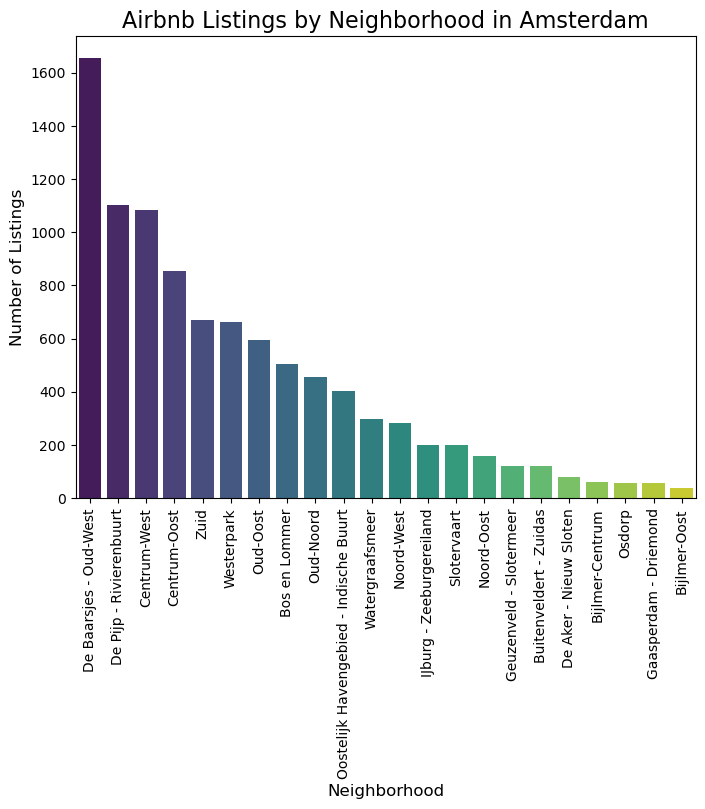

In [195]:

neighborhood_counts = df['neighbourhood'].value_counts() 

plt.figure(figsize=(8, 6))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values, palette='viridis')


plt.title('Airbnb Listings by Neighborhood in Amsterdam', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=90) 
plt.show()


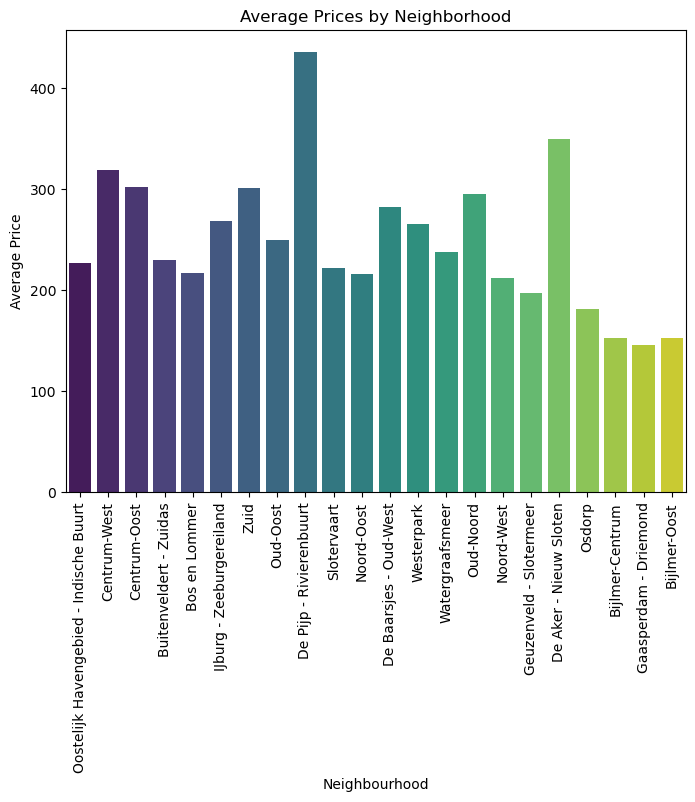

In [116]:
plt.figure(figsize=(8, 6))
sns.barplot(x='neighbourhood', y='price', data=df, estimator='mean', errorbar=None, hue='neighbourhood', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Average Prices by Neighborhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.show()


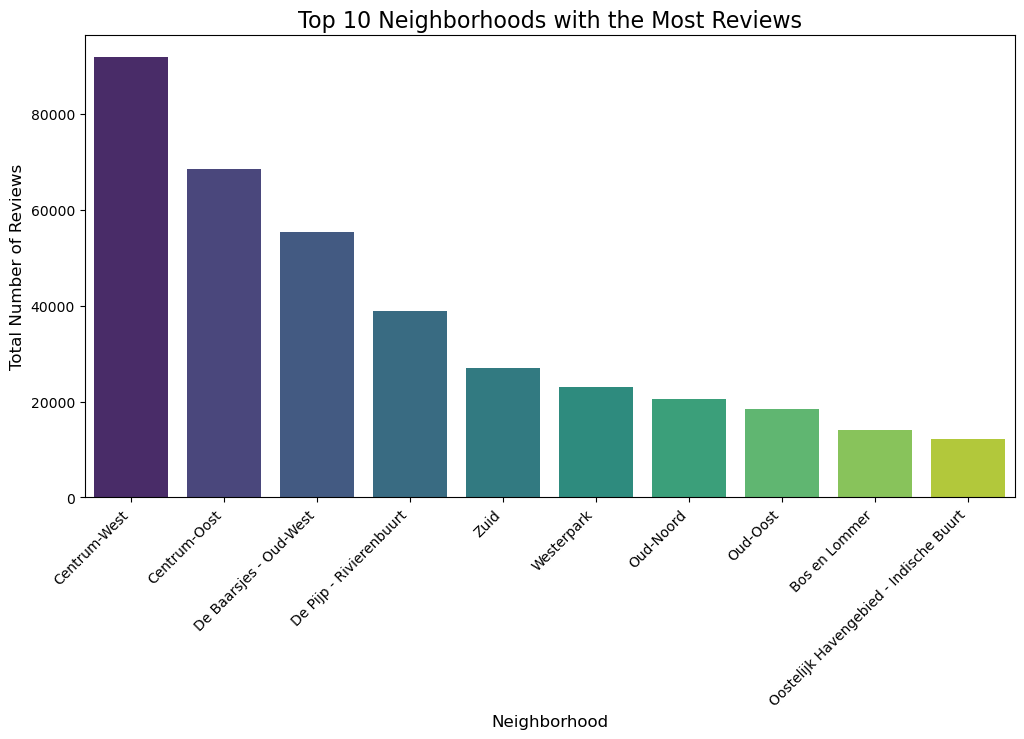

In [180]:

top_neighbourhood_reviews = df.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighbourhood_reviews.index, y=top_neighbourhood_reviews.values, palette='viridis')


plt.title('Top 10 Neighborhoods with the Most Reviews', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Total Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')


plt.show()


###  Interactive Map

In [16]:
# We are creating the Amsterdam map
amsterdam_map = folium.Map(location=[52.3676, 4.9041], zoom_start=12)


for idx, row in df.iterrows():
   
    if row['price'] < 100:
        color = 'green'
    elif 100 <= row['price'] <= 200:
        color = 'orange'
    else:
        color = 'red'
    
    
    radius = 5

   
    popup_text = f"<strong>{row['name']}</strong><br>Price: €{row['price']}<br>Reviews: {row['number_of_reviews']}<br>Location: {row['neighbourhood']}"

    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=radius,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(amsterdam_map)


amsterdam_map.save("amsterdam_airbnb_enhanced_map_fixed_size.html")

### Room Type

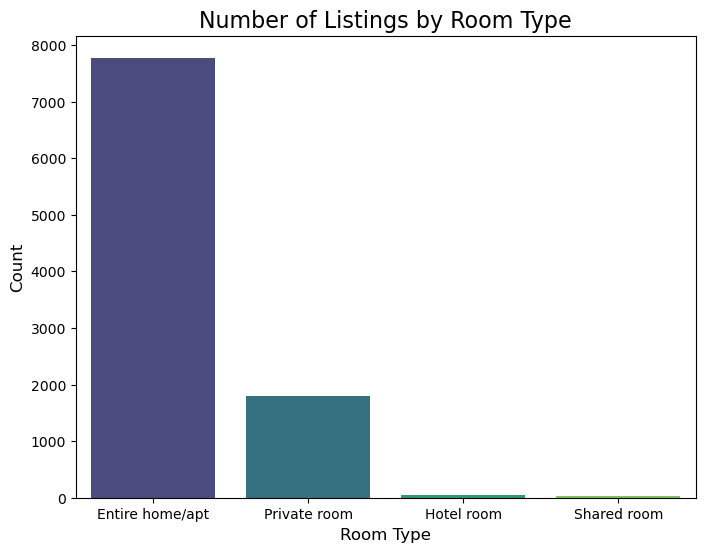

In [161]:

room_type_counts = df['room_type'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')


plt.title('Number of Listings by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.show()

### Top Hosts

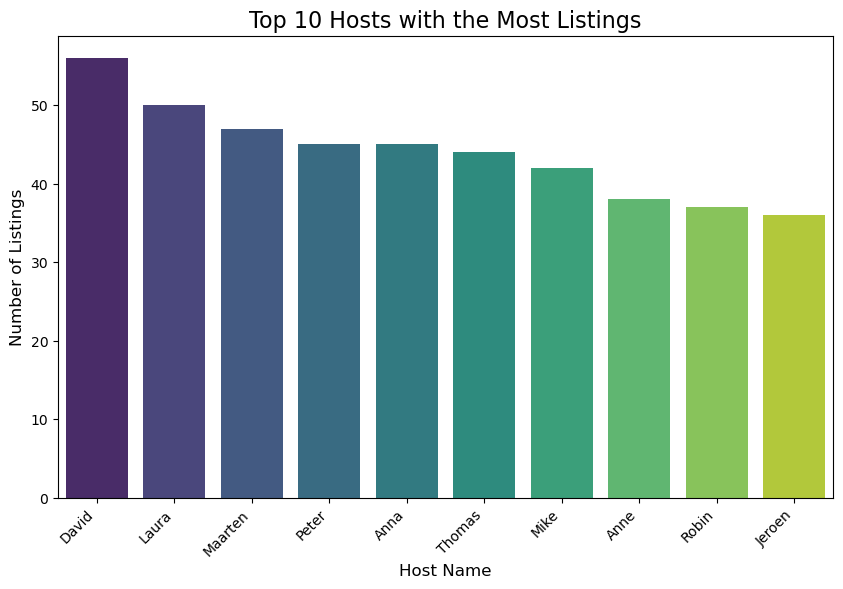

In [168]:

top_hosts = df['host_name'].value_counts().head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='viridis')


plt.title('Top 10 Hosts with the Most Listings', fontsize=16)
plt.xlabel('Host Name', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45, ha='right')


plt.show()


                                  reviews_per_month  number_of_reviews
host_name                                                             
Jean Paul                                 34.962000               6812
Conscious Hotel The Tire Station          18.797500               3668
CityHub                                   43.500000               2907
Peter                                      4.182500               2881
Eric                                       8.060000               2498
Marcel                                     3.407143               2444
Paul                                       3.240000               2367
Jesse                                      4.836000               2340
Bunk                                      10.878571               2312
Galanti                                    8.791667               2310


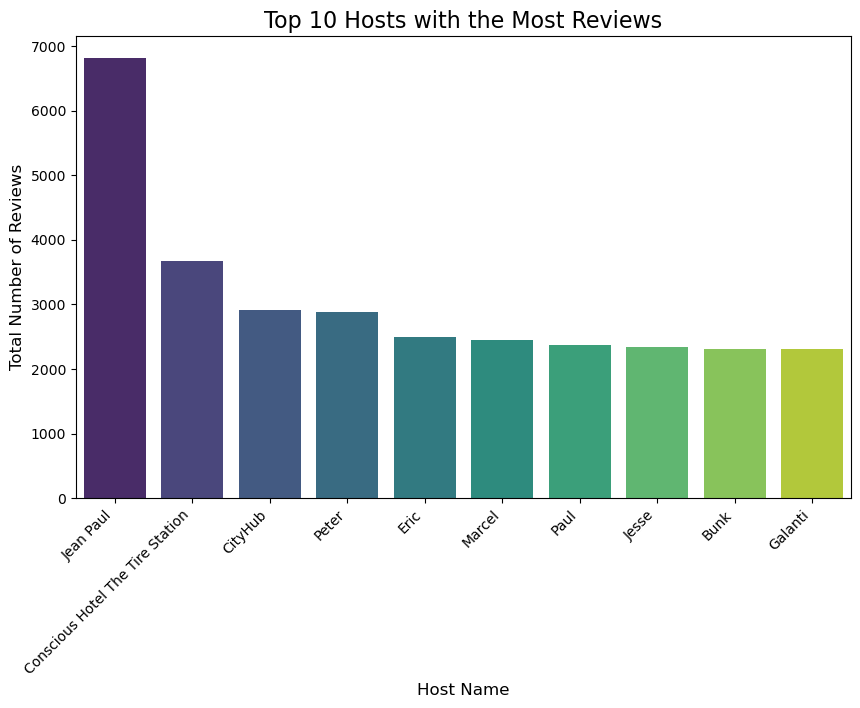

In [184]:

good_hosts = df[df['reviews_per_month'] > 1]  
good_hosts = good_hosts[good_hosts['number_of_reviews'] > 50]  


good_hosts_summary = good_hosts[['host_name', 'reviews_per_month', 'number_of_reviews']]


good_hosts_summary = good_hosts_summary.groupby('host_name').agg({
    'reviews_per_month': 'mean',
    'number_of_reviews': 'sum'
}).sort_values(by='number_of_reviews', ascending=False).head(10)


print(good_hosts_summary)


plt.figure(figsize=(10, 6))
sns.barplot(x=good_hosts_summary.index, y=good_hosts_summary['number_of_reviews'], palette='viridis')


plt.title('Top 10 Hosts with the Most Reviews', fontsize=16)
plt.xlabel('Host Name', fontsize=12)
plt.ylabel('Total Number of Reviews', fontsize=12)
plt.xticks(rotation=45, ha='right')


plt.show()


### Relationship Price and Number of Nights

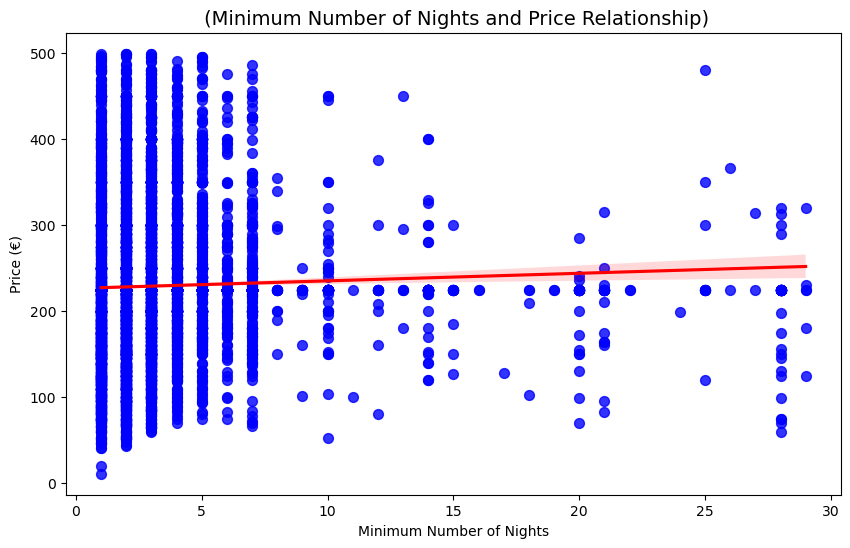

In [174]:
#Relationship between minimum number of nights and price
df_filtered = df[(df['price'] < 500) & (df['minimum_nights'] < 30)]

plt.figure(figsize=(10, 6))
sns.regplot(x='minimum_nights', y='price', data=df_filtered, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title(' (Minimum Number of Nights and Price Relationship)', fontsize=14)
plt.xlabel('Minimum Number of Nights')
plt.ylabel('Price (€)')
plt.show()